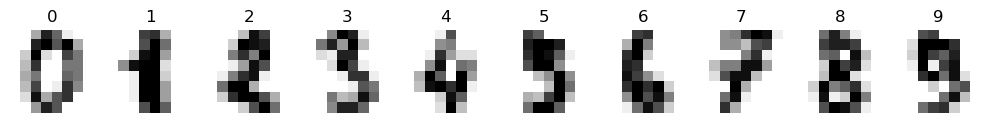

In [1]:

"""
scikitの手書き文字を表示するコードを書いてください。
"""

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# digitsデータセットの読み込み
digits = load_digits()

# 表示する画像数（例として最初の10枚を表示）
n_images = 10

# サブプロットの作成
fig, axes = plt.subplots(1, n_images, figsize=(10, 2))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(str(label))
    ax.axis('off')  # 軸を非表示にする

plt.tight_layout()
plt.show()


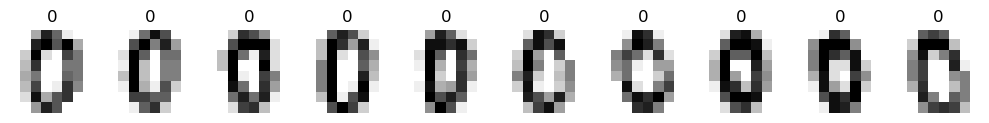

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# digitsデータセットの読み込み
digits = load_digits()

# 表示する画像数（例として最初の10枚を表示）
n_images = 10
target = 0  # 例として数字0の画像を抽出

# 指定したターゲットのインデックスを取得
index = []
for i, label in enumerate(digits.target):
    if label == target:
        index.append(i)
    if len(index) >= n_images:
        break  # 指定した数だけ取得したら終了

# 抽出したデータ
target_digits = digits.images[index]
target_labels = digits.target[index]

# サブプロットの作成
fig, axes = plt.subplots(1, n_images, figsize=(10, 2))
for ax, image, label in zip(axes, target_digits, target_labels):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(str(label))
    ax.axis('off')  # 軸を非表示にする

plt.tight_layout()
plt.show()


Epoch [1/100], Loss: 0.1272
Epoch [2/100], Loss: 0.0756
Epoch [3/100], Loss: 0.0708
Epoch [4/100], Loss: 0.0629
Epoch [5/100], Loss: 0.0605
Epoch [6/100], Loss: 0.0568
Epoch [7/100], Loss: 0.0537
Epoch [8/100], Loss: 0.0518
Epoch [9/100], Loss: 0.0508
Epoch [10/100], Loss: 0.0499
Epoch [11/100], Loss: 0.0481
Epoch [12/100], Loss: 0.0462
Epoch [13/100], Loss: 0.0462
Epoch [14/100], Loss: 0.0447
Epoch [15/100], Loss: 0.0441
Epoch [16/100], Loss: 0.0438
Epoch [17/100], Loss: 0.0429
Epoch [18/100], Loss: 0.0425
Epoch [19/100], Loss: 0.0424
Epoch [20/100], Loss: 0.0426
Epoch [21/100], Loss: 0.0413
Epoch [22/100], Loss: 0.0414
Epoch [23/100], Loss: 0.0409
Epoch [24/100], Loss: 0.0406
Epoch [25/100], Loss: 0.0400
Epoch [26/100], Loss: 0.0397
Epoch [27/100], Loss: 0.0392
Epoch [28/100], Loss: 0.0398
Epoch [29/100], Loss: 0.0395
Epoch [30/100], Loss: 0.0393
Epoch [31/100], Loss: 0.0384
Epoch [32/100], Loss: 0.0382
Epoch [33/100], Loss: 0.0387
Epoch [34/100], Loss: 0.0376
Epoch [35/100], Loss: 0

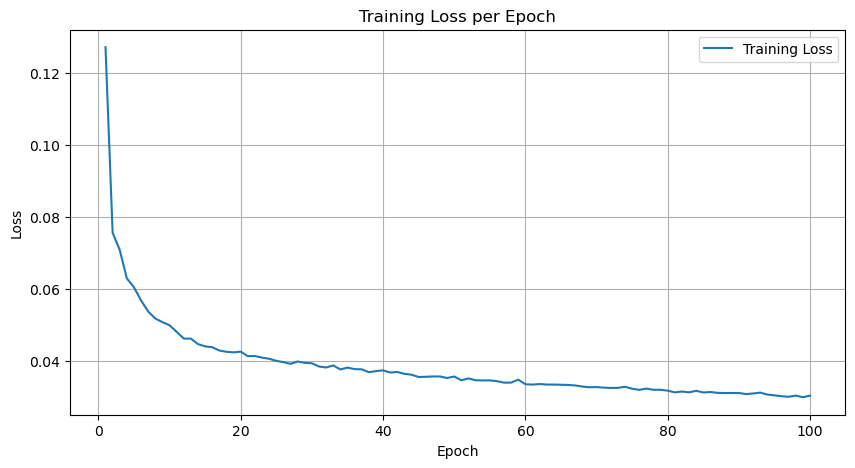

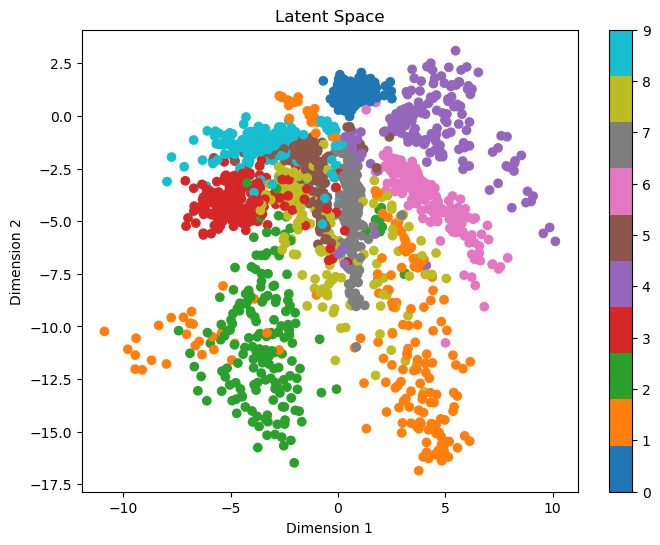

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from sklearn.datasets import load_digits
from torch.utils.data import DataLoader, TensorDataset
import random
import numpy as np


seed = 42
random.seed(seed)
np.random.seed(seed)

# データをロードします
digits = load_digits()
data = digits.data
targets = digits.target

# データを正規化します
data = data / 16.0  # 0-16までの整数値なので16で割って正規化

# NumPy配列をPyTorchのテンソルに変換します
data = torch.tensor(data, dtype=torch.float32)
targets = torch.tensor(targets, dtype=torch.int64)

# TensorDatasetとDataLoaderを構築
dataset = TensorDataset(data, targets)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# class Autoencoder(nn.Module):
#     def __init__(self, input_dim, hidden_dim, latent_dim):
#         super(Autoencoder, self).__init__()
#         # エンコーダー: 入力層 -> 隠れ層 -> 潜在層
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, latent_dim)
#         )
#         # デコーダー: 潜在層 -> 隠れ層 -> 出力層
#         self.decoder = nn.Sequential(
#             nn.Linear(latent_dim, hidden_dim),
#             nn.ReLU(),
#             nn.Linear(hidden_dim, input_dim),
#             nn.Sigmoid()  # 出力を0-1に制限
#         )

#     def forward(self, x):
#         z = self.encoder(x)
#         x_reconstructed = self.decoder(z)
#         return x_reconstructed, z

class Autoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, latent_dim):
        super(Autoencoder, self).__init__()
        # エンコーダー: 入力層 -> 隠れ層1 -> 隠れ層2 -> 潜在層
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),  # 追加の隠れ層
            nn.ReLU(),
            nn.Linear(hidden_dim2, latent_dim)
        )
        # デコーダー: 潜在層 -> 隠れ層1 -> 隠れ層2 -> 出力層
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim2),
            nn.ReLU(),
            nn.Linear(hidden_dim2, hidden_dim1),  # 追加の隠れ層
            nn.ReLU(),
            nn.Linear(hidden_dim1, input_dim),
            nn.Sigmoid()  # 出力を0-1に制限
        )

    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, z

input_dim = data.shape[1]  # 64 (8x8画像)
hidden_dim1 = 128        # 隠れ層の次元
hidden_dim2 = 64        # 隠れ層の次元

latent_dim = 2          # 潜在空間の次元

# モデル、損失関数、最適化手法の設定
model = Autoencoder(input_dim, hidden_dim1, hidden_dim2, latent_dim)
criterion = nn.MSELoss()  # 損失関数は平均二乗誤差
# criterion = nn.BCELoss()  # 損失関数はBCE

optimizer = optim.Adam(model.parameters(), lr=0.001)

# 学習を行います
num_epochs = 100

losses = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_data, _ in dataloader:
        # モデルを訓練モードに設定
        model.train()
        
        # 順伝播
        reconstructed, _ = model(batch_data)
        loss = criterion(reconstructed, batch_data)
        
        # 逆伝播と最適化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # バッチの損失をエポックの総損失に加算
        epoch_loss += loss.item()
    
    # エポックごとに損失を記録
    average_loss = epoch_loss / len(dataloader)
    losses.append(average_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')



import matplotlib.pyplot as plt

# 損失のプロット
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# 全データを用いて潜在変数を取得
model.eval()
with torch.no_grad():
    _, latent_space = model(data)

# 2次元潜在空間をプロット
latent_space = latent_space.numpy()
plt.figure(figsize=(8, 6))
plt.scatter(latent_space[:, 0], latent_space[:, 1], c=targets, cmap='tab10')
plt.colorbar()
plt.title('Latent Space')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

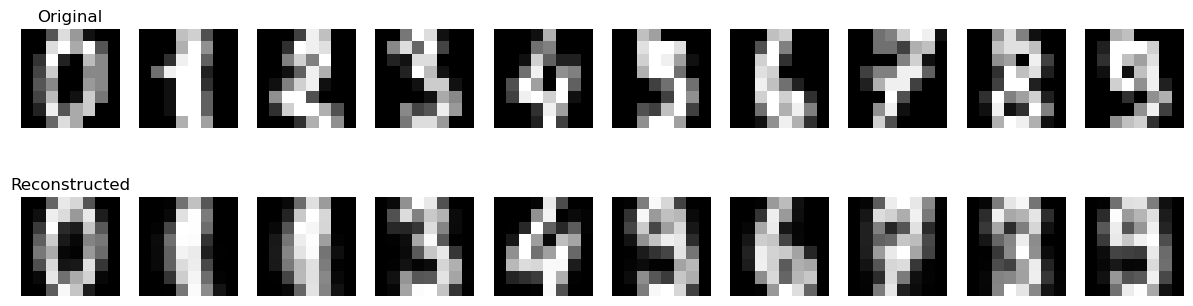

In [4]:
import matplotlib.pyplot as plt

# 訓練済みモデルを評価モードに切り替え
model.eval()

# 入力データをモデルに通して再構成を取得
with torch.no_grad():
    reconstructed_data, _ = model(data)

# Tensor を numpy array に変換
input_data_np = data.numpy()
reconstructed_data_np = reconstructed_data.numpy()

# 比較するための画像数を設定
num_images_to_show = 10  # 例えば最初の10個を表示

# 図示
fig, axes = plt.subplots(nrows=2, ncols=num_images_to_show, figsize=(15, 4))
for i in range(num_images_to_show):
    # 入力画像
    axes[0, i].imshow(input_data_np[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')
    
    # 再構成画像
    axes[1, i].imshow(reconstructed_data_np[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Original", fontsize=12)
axes[1, 0].set_title("Reconstructed", fontsize=12)

plt.show()

In [5]:
# ユーザー追加

factor = 0.5
(x1, y1), (x2, y2) = (latent_space.min(axis=0) - latent_space.ptp(axis=0)*factor,
                      latent_space.max(axis=0) + latent_space.ptp(axis=0)*factor)

print("xrange", x1,x2)
print("yrange", y1,y2)

xrange -21.38504 20.62922
yrange -26.832031 13.077458


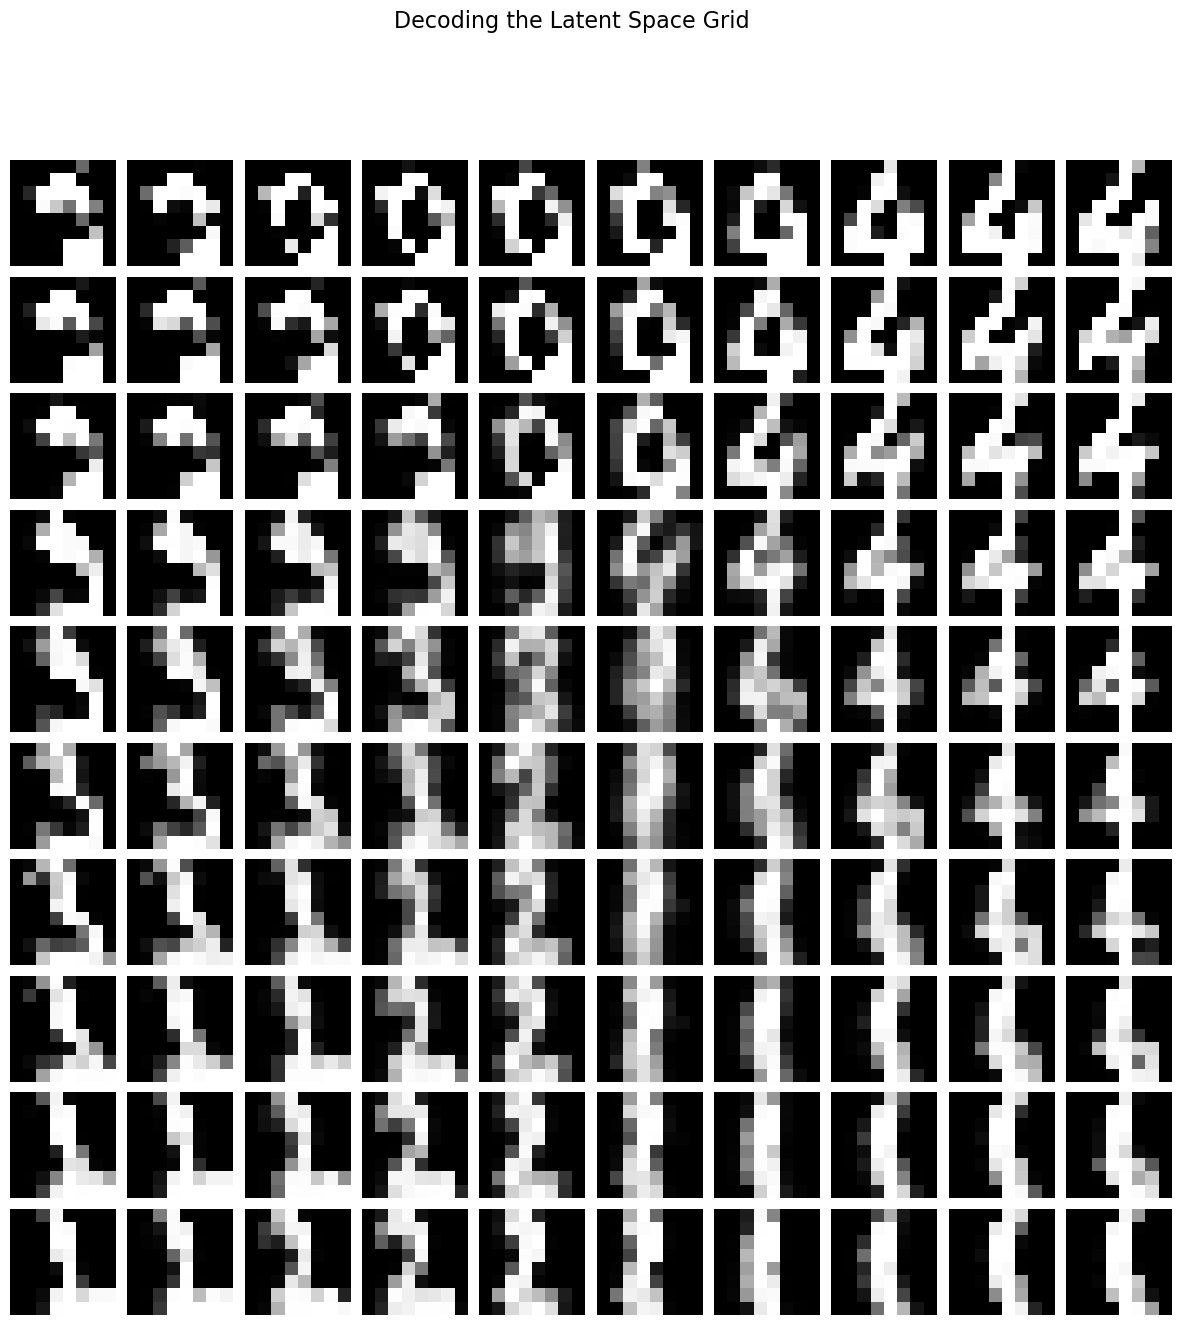

In [6]:
import numpy as np

# 潜在空間を10x10のグリッドに分割
x_range = (x1, x2)
y_range = (y2, y1)

# 分割数
n_bins = 10

# 潜在空間を10x10のグリッドに分割
fig, axarr = plt.subplots(n_bins, n_bins, figsize=(15, 15))

x_bins = np.linspace(x_range[0], x_range[1], n_bins)
y_bins = np.linspace(y_range[0], y_range[1], n_bins)

# 各グリッドに対応する潜在コードからデコードされた各画像を表示
for i, x_val in enumerate(x_bins):
    for j, y_val in enumerate(y_bins):
        # 選ばれた潜在変数のグリッドでの座標
        z = torch.tensor([[x_val, y_val]], dtype=torch.float32)

        # デコードして画像を生成
        with torch.no_grad():
            generated = model.decoder(z).numpy().reshape(8, 8)

        # 画像をプロット
        axarr[j, i].imshow(generated, cmap='gray')
        axarr[j, i].axis('off')

plt.suptitle('Decoding the Latent Space Grid', fontsize=16)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()